# 비지도 학습

**: 입력 특성 X는 있으나 레이블 y는 없는 데이터**

- 찾아보기
- 계층적 
- 분할적
- 병합적

예. 제조 라인에서 제품의 사진을 받아 결함이 있는 제품을 감지하는 시스템
- 자동으로 사진을 찍는 시스템
- '결함' 또는 '정상' 레이블은 수동으로 부여해야 함
- (문제점)
    - 작업 시간이 오래 걸리고 비용이 많이 듬
    - 분류기 성능이 떨어짐
    - 제품이 바뀔때마다 전체 과정을 처음부터 다시 시작해야 함
    
⇒ 사람이 모든 사진에 레이블을 붙일 필요 없이 알고리즘이 레이블이 없는 데이터를 바로 사용하는 경우

얀 르쿤(Yann André LeCun)
- "지능이 케이크라면 비지도학습은 케이크의 빵이고, 지도학습은 케이크 위의 크림이고, 강화학습은 케이크 위의 체리이다"

**비지도학습을 사용하는 이유**
- 알려지지 않은 모든 종류의 패턴을 찾으려는 시도
- 범주화에 도움이 되는 특징과 패턴을 알아내는데 도움이 됨
- 새로운 데이터에 대한 실시간으로 처리 가능
- 레이블되지 않은 데이터가 더 확보하기 쉬움

### 비지도학습 알고리즘

**군집(clustering)**
- 비슷한 샘플을 클러스터(cluster)로 모음
- 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할, 준지도학습, 차원축소 등에 사용
    

**이상치 탐지(outlier detection)**
- '비정상'데이터 감지
- 결함 제품 감지, 시계열분석에서 새로운 트렌드 탐색 
    
**밀도 추정(density estimation)**
- 데이터 셋 생성 확률 과정(random process)의 확률밀도함수(Probability Density Function) 추정
- 이상치 탐지
    - 밀도가 매우 낮은 영역에 놓이 샘플이 이상치일 가능성이 높음
- 데이터 분석과 시각화


# 군집(clustering)

- 비슷한 샘플을 구별해 하나의 클러스터(cluster) 또는 비슷한 샘플의 그룹으로 할당하는 작업
- 비지도학습

### iris dataset

In [3]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target
iris_df = pd.DataFrame(X , columns = iris.feature_names)
iris_df['target'] = y
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
X[y==0, 2]

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**꽃잎의 너비와 길이에 대한 산점도** 

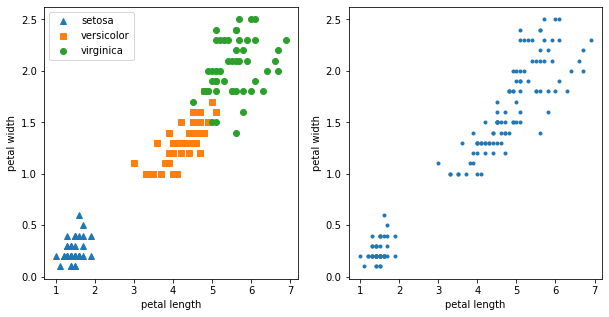

In [11]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(X[y==0, 2] , X[y==0, 3], '^' , label='setosa') # y가 0일때 2번째 값 (petal length)
plt.plot(X[y==1, 2] , X[y==1, 3] , 's' , label='versicolor')
plt.plot(X[y==2, 2] , X[y==2, 3] , 'o' , label='virginica')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

plt.subplot(122)
plt.scatter(X[:,2] , X[:,3] , marker='.')

plt.xlabel('petal length')
plt.ylabel('petal width')

plt.show()

### 군집을 사용하는 어플리케이션

**고객분류**
- 구매 이력이나 웹사이트 내 행동 등을 기반으로 클러스터로 모음
- 고객 그룹마다 제품 추천이나 마케팅 전략을 다르게 적용할 수 있음
    - 동일한 클러스터 내 사용자가 좋아하는 컨텐츠를 추천하는 추천 시스템
    
**데이터 분석**
- 새로운 데이터셋 분석 시 군집 알고리즘을 실행하고 각 클러스터를 따로 분석

**차원축소**
- 한 데이터셋에 군집 알고리즘을 적용하면 각 클러스터에 대한 샘플의 친화성(affinity)을 측정
    - 친화성 : 샘플이 클러스터에 얼마낫 잘 맞는지 측정
- 각 샘플의 특성 벡터 $x$는 클러스터 친화성의 벡터로 변경
    - $k$개의 클러스터가 있다면 친화성 벡터는 $k$차원
    - 친화성 벡터는 원본 특성 벡터보다 저차원
    - 분석을 위한 충분한 정보를 가질 수 있음
    
**이상치 탐지**
- 친화성이 낮은 샘플은 이상치일 가능성이 높음
    - 예. 웹사이트 내 행동을 기반으로 사용자의 클러스터를 만든 경우 초당 웹서버 요청을 비정상적으로 많이 하는 사용자를 감지
- 부정거래 감지(fraud detection)에 활용

**준지도학습**
- 레이블된 샘플이 적은 경우 군집을 수행하고 동일한 클러스터에 있는 모든 샘플에 레이블을 전파한 후 지도학습 알고리즘을 적용하여 학습
    - 성능을 크게 향상시킴
    
**검색엔진**
- 제시된 이미지와 비슷한 이미지를 찾아주는 검색엔진
    - 데이터베이스에 있는 모든 이미지에 대해 군집 알고리즘을 적용
    - 비슷한 이미지는 동일한 클러스터에 속함
    - 사용자가 찾으려는 이미지를 제공하면 훈련된 군집 모델을 사용해 이미지의 클러스터를 찾음
    - 그 다음 이 클러스터의 모든 이미지를 반환
    
**이미지 분할**
- 색을 기반으로 픽셀을 클러스터로 모은 후 각 픽셀의 색을 해당 클러스터의 평균 색으로 변경
    - 이미지에 있는 색상의 종류를 크게 줄이는 효과
- 물체의 윤곽을 감지하기 쉬워져 물체 탐지 및 추적 시스템에  적용


# k-평균
- 몆번의 반복으로 데이터셋을 빠르고 효율적으로 클러스터로 묶는 알고리즘
- 1957년 Bell Lab. 스튜어트 로이드(Stuart Lloyd)가 펄스 부호 변조(pulse-code modulation) 기법으로 제안
    - 1982년 외부에 공개
- 1965년 에드워드 포지(Edward W. Forgr)도 동일한 알고리즘 발표
- k-평균을 로이드-포지 알고리즘이라 부름

## K-평균의 장점
- 일반적인 군집화에서 가장 많이 활용되는 알고리즘이다
- 알고리즘이 쉽고 간결하다

## K-평균의 단점
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어진다. (이를 위해 PCA로 차원 감소 적용 필요)
- 반복을 수행하는데 반복 횟수가 많을 경우 수행 시간이 매우 느려진다
- 몇 개의 군집(cluster)을 선택해야 할지 가이드하기 어렵다

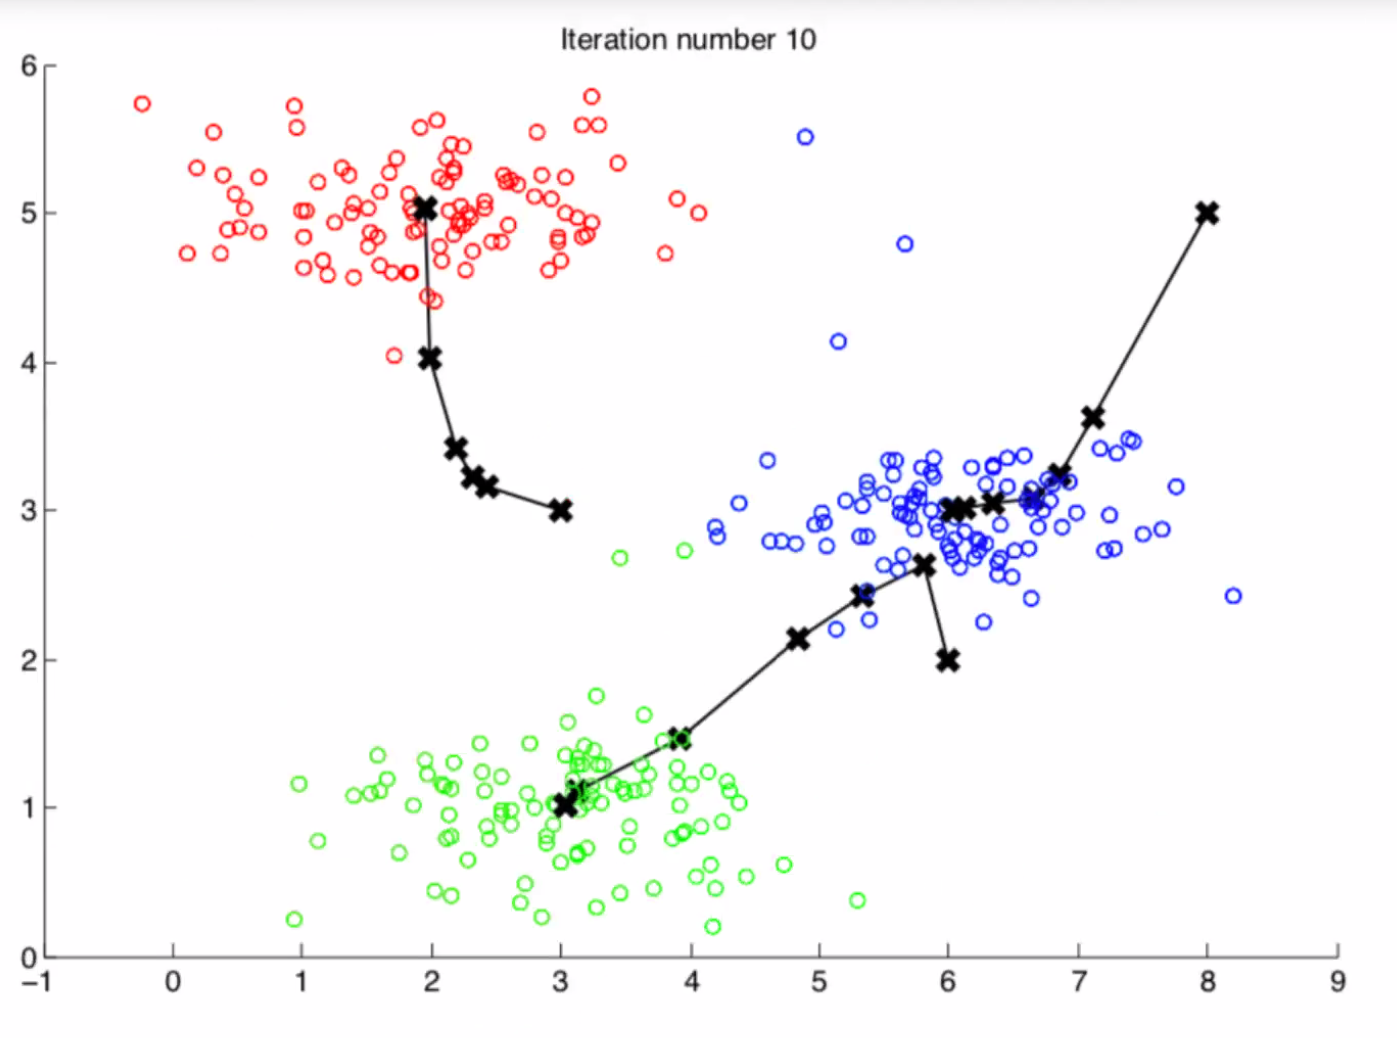

### 군집화 알고리즘 테스트를 위한 데이터 생성

**sklearn.datasets의 군집화용 데이터 생성기 API**
-  make_blobs() / make_classification()
    - 여러 클래스에 해당하는 데이터 세트를 생성
    - 하나의 클래스에 여러 개의 군집(cluster)이 분포될 수 있게 데이터를 생성
    - 군집과 분류를 위한 테스트 데이터 생성을 위해 사용
    - 두 API의 차이점
        - make_blobs() 
            - 개별 군집의 중심점과 표준편차 제어 기능이 추가되어 있음       
        - make_classification()
            - 노이즈를 포함한 데이터를 만드는데 유용
            
  
- make_circle() / make_moon()
    - 중심 기반의 군집화로 해결하기 어려운 데이터 세트 생성

**make_blobs(n_samples, n_features, centers, cluster_std)**

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification

https://datascienceschool.net/03%20machine%20learning/09.02%20%EB%B6%84%EB%A5%98%EC%9A%A9%20%EA%B0%80%EC%83%81%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%83%9D%EC%84%B1.html

- 매개변수들
    - n_samples : 생성할 총 데이터 개수, 디폴트는 100개
    - n_features : 데이터의 피처 개수, 디폴트는 2
        - 시각화를 목표로 할 경우 2개로 설정
        - 첫번째 피처는 x좌표, 두번째 피처는 y좌표상에 표현
    - centers
        - int 값으로 설정할 경우 : 군집의 개수
        - ndarray 형태로 표현할 경우 : 개별 군집 중심점 좌표 의미 
    - cluster_std : 생성될 군집 데이터의 표준 편차
        - float 값 하나로 지정할 경우 : 군집 내에서 데이터들이 갖는 표준편차
        - float 리스트로 지정할 경우 : 각 군집 내 데이터의 표준편차
    - shuffle : 부울, 기본값=True
        - 샘플을 섞음
    - random_state : 데이터 세트 생성을 위한 난수 생성을 결정
    - return_centers : 부울, 디폴트는 False
        - True이면 각 클러스터의 중심을 반환


- 피처데이터세트와 타깃 데이터세트가 튜플로 반환

### make_blobs()를 이용한 데이터 생성

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
from sklearn.datasets import make_blobs
# 군집이 3개, 피처가 2개 200개 샘플 데이터 생성

X , y = make_blobs(n_samples=200 , n_features=2 , centers=3 , cluster_std=0.8, random_state=0)

X.shape , y.shape

# n_samples : 표본 데이터의 수, 디폴트 100

# n_features : 독립 변수의 수, 디폴트 20

# centers : 생성할 클러스터의 수 혹은 중심, [n_centers, n_features] 크기의 배열. 디폴트 3

# cluster_std: 클러스터의 표준 편차, 디폴트 1.0

# center_box: 생성할 클러스터의 바운딩 박스(bounding box), 디폴트 (-10.0, 10.0))

# 반환값:

# X : [n_samples, n_features] 크기의 배열

# 독립 변수

# y : [n_samples] 크기의 배열

# 종속 변수

((200, 2), (200,))

In [19]:
# y target 값의 분포를 확인
y[:10]

array([2, 0, 0, 2, 0, 2, 1, 1, 0, 2])

In [26]:
unique , counts = np.unique(y, return_counts=True) # return_counts : 카운트 결과 반환
print(unique, counts)

[0 1 2] [67 67 66]


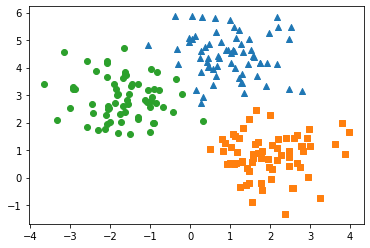

In [30]:
# 각 target별 scatter plot 의 marker 값들. 
plt.scatter(X[y==0,0] , X[y==0,1], marker='^' )
plt.scatter(X[y==1,0] , X[y==1,1], marker='s' )
plt.scatter(X[y==2,0] , X[y==2,1], marker='o' )
plt.show()

**make_blobs()의 `cluster_std  매개변수`**
- 이 값이 작을수록 군집 중심에 데이터가 모여있으며, 클수록 데이터가 퍼져있음

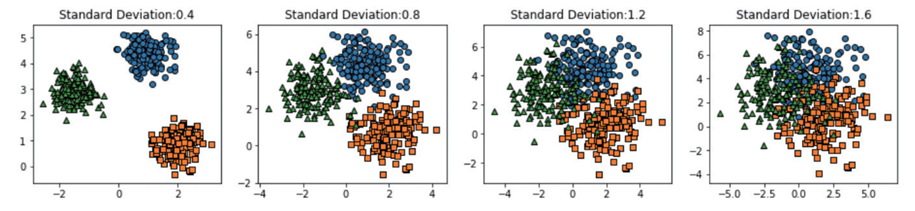

**5개 군집 데이터셋 생성**

In [37]:
# 5개 중심점 좌표 설정
blob_center = np.array(
                [[0.2, 2.3],
                [-1.5, 2.3],
                [-2.8, 1.8],
                [-2.8, 2.8],
                [-2.8, 1.3]])

blob_std = np.array([0.4 , 0.3, 0.1, 0.1, 0.6]) #5개

In [38]:
# 지정한 중심을 갖는 5개 클러스터로 된 데이터셋 2000개 생성

X , y = make_blobs(n_samples=2000 , centers=blob_center , cluster_std=blob_std,
          random_state=7)

X.shape , y.shape

((2000, 2), (2000,))

**생성한 데이터셋의 산점도**

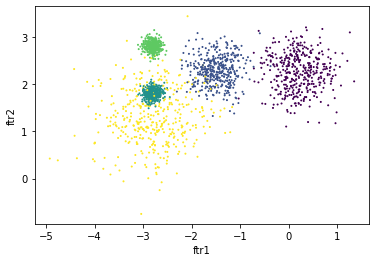

In [39]:
plt.scatter(X[:,0] , X[:,1] , c=y, s=1)
plt.xlabel('ftr1')
plt.ylabel('ftr2')
plt.show()

## 사이킷런의 군집 알고리즘 클래스 KMeans
**sklearn.cluster의 `KMeans`**

**`KMeans` 클래스**

- 기본적으로 최적화된 알고리즘을 적용


- K-평균 초기화 파라미터 중 가장 중요한 파라미터
    - n_clutsers : 클러스터 개수(클러스터 중심점의 개수)
    - init : 초기에 클러스터 중심점 좌표를 설정할 방식
        - 디폴트는 'k-means++'
        - 임의로 중심점을 설정할 경우 'random'
        - 사실 기본값이 ‘k-means++’라… 따로 지정 안 해주면 알아서 ++로 돌린다. 만약 전통적인 k-means로 중심점을 랜덤하게 지정하고 싶으면 init='random'을 써줘야 한다.
    - max_iter : 최대 반복횟수
        - 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료
        
        
- K-평균 알고리즘을 사용하려면 `init="random"`, `n_init=1`, `algorithm="full"`로 설정해야 함

### KMeans 객체의 군집화 적용 메서드

**`fit(X)`** : k-평균 클러스터링을 계산

**`fit_predict(X)`** : 클러스터 중심을 계산하고 각 샘플에 대한 클러스터 인덱스를 예측

**`fit_transform(X)`**  :클러스터링을 계산하고 X를 클러스터 거리 공간으로 변환

In [40]:
from sklearn.cluster import KMeans

k=5
kmeans = KMeans(n_clusters=k , random_state=42)
y_pred = kmeans.fit_predict(X)

In [41]:
y_pred

array([0, 0, 1, ..., 3, 1, 0])

### K-평균 결과를 가지고 있는 인스턴스들

**레이블(label)**

In [42]:
kmeans.labels_

array([0, 0, 1, ..., 3, 1, 0])

**클러스터의 centroids**
- KMeans의 **cluster_centers_** 인스턴스에 저장

In [53]:
np.round(kmeans.cluster_centers_,2) # 5개에 대한 중심점

array([[-2.82,  1.79],
       [ 0.21,  2.26],
       [-1.49,  2.23],
       [-2.79,  2.79],
       [-2.91,  0.86]])

In [54]:
blob_center

array([[ 0.2,  2.3],
       [-1.5,  2.3],
       [-2.8,  1.8],
       [-2.8,  2.8],
       [-2.8,  1.3]])

**새로운 샘플에 대한 가까운 센트로이드의 클러스터 할당**

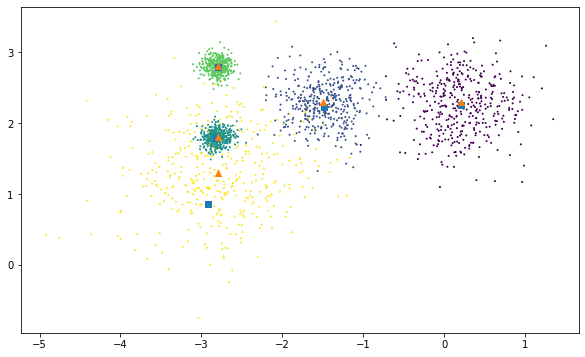

In [55]:
centers = kmeans.cluster_centers_

plt.figure(figsize=(10,6))
plt.scatter(X[:,0] , X[:,1], c=y, s=1)
plt.scatter(centers[:,0] , centers[:,1] , marker='s')
plt.scatter(blob_center[:,0] , blob_center[:,1] , marker='^')
plt.show()

## k-평균 군집화 알고리즘
- 군집의 중심이 되는 k개 seed 점들을 선택하여 이 seed와 가까운 개체들을 그룹화하는 방법

**알고리즘**
1. k개 중심점(centroid)을 임의로 배치한다
    - 무작위로 k개 샘플을 선택하여 중심점으로 결정
2. 모든 자료와 k개의 중심점과 거리를 계산하여 가장 가까운 중심점의 군집으로 할당한다.
3. 군집의 중심을 구한다(평균을 구한다)
4. 정지 규칙에 이를 때까지 2~3단계를 반복한다
    - 군집의 변화가 없을 때
    - 중심점의 이동이 임계값 이하일 때

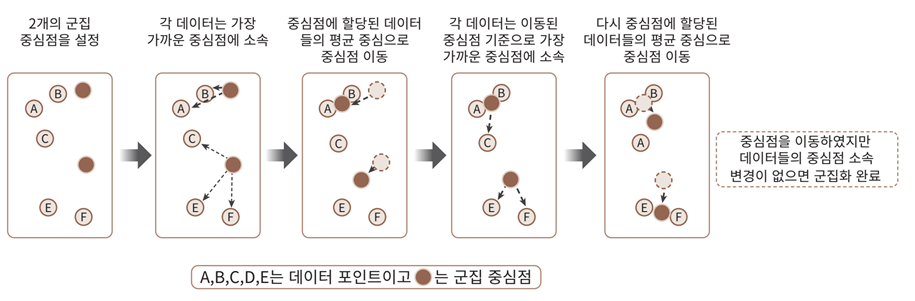

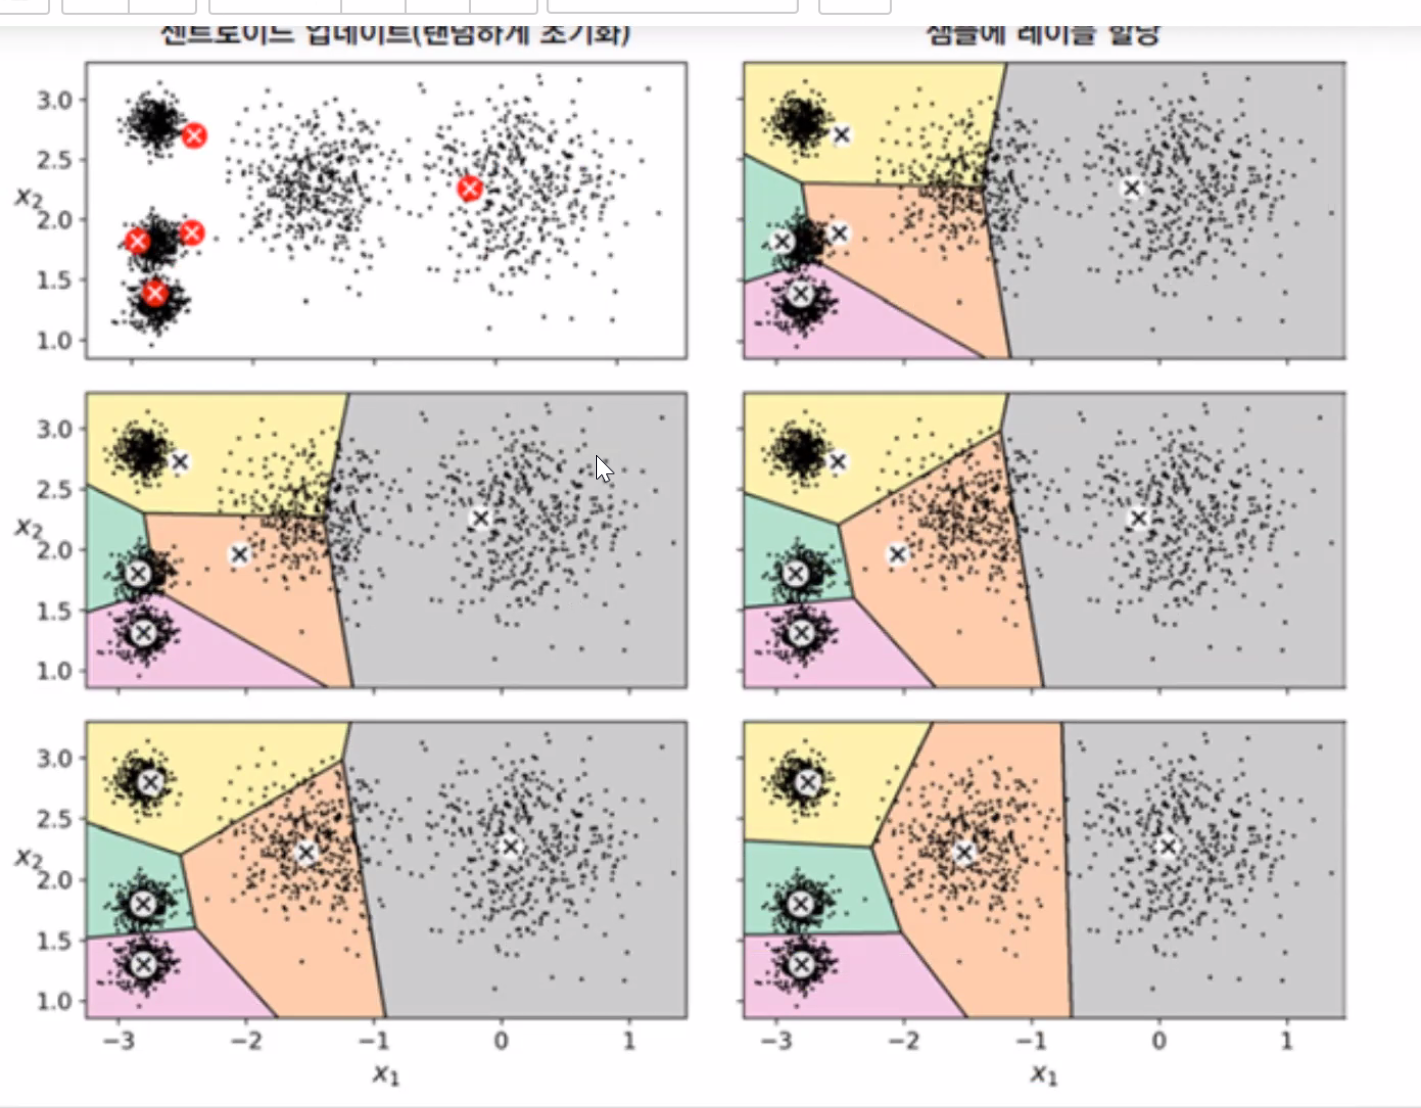

## K-평균을 이용한 iris dataset 군집화

In [76]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

In [77]:
# KMeans 수행

kmeans_iris = KMeans(n_clusters=3 , init='k-means++' , max_iter=300 , random_state=0) #300회 진행하고 그 전에 이동이 없으면 종료
kmeans_iris.fit(X)


KMeans(n_clusters=3, random_state=0)

In [79]:
# 군집화 결과 확인
kmeans_iris.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [70]:
# 실제 분류값 target과 군집화 분류값 labels 비교

iris_df = pd.DataFrame(data=X , columns=iris.feature_names)
iris_df['target']=y
iris_df['cluster'] = kmeans_iris.labels_
iris_result = iris_df.groupby(['target' , 'cluster'])['sepal length (cm)'].count()
iris_result

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal length (cm), dtype: int64

- 0 : 'setosa', 1 : 'versicolor', 2 : 'virginica'

- 분류 타깃이 0값인 데이터들 모두 1번 클러스터로 그룹화됨
- 타깃이 1인 데이터들 중 2개만 2번 클러스터로 그룹화되고 48개가 1번 클러스터로 그룹화됨
- 타깃이 2인 데이터들 중 36개만 2번 클러스터로 그룹화되고 14개 데이터가 0번 클러스터로 그룹화됨

### PCA로 차원 축소된 붓꽃 데이터의 K-평균 군집화

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(X)

iris_df['pca_1'] = iris_pca[:,0]
iris_df['pca_2'] = iris_pca[:,1]
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,pca_1,pca_2
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


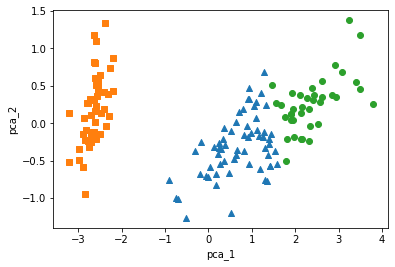

In [75]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시



# setosa의 target 값은 0 , versicolor는 1 , virginica는 2
# 각 target 별로 다른 shape으로 scatterplot

markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_df[iris_df['cluster']==i]['pca_1'] # x축
    y = iris_df[iris_df['cluster']==i]['pca_2'] #y축
    plt.scatter(x, y, marker=marker)
    
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.show()


## K-평균 장점과 단점
- **장점**
    - 일반적인 군집화에서 가장 많이 활용되는 알고리즘
    - 알고리즘이 쉽고 간결
    
    
- **단점**
    - 거리 기반 알고리즘으로 속성의 개수가 많을 경우 군집화 정확도가 떨어짐
        - PCA와 같은 차원축소를 적용할 수 있음
    - 반복을 수행하는데 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
    - 몇 개의 클러스터(군집)를 선택해야 할지 가이드하기 어려움